In [48]:
import pandas as pd
import numpy as np
import pyarrow
import seaborn as sns
import statsmodels.api as sm
from pysal.model import spreg
from pysal.lib import weights
from scipy import stats
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import osmnx as ox
import libpysal
import time
from geopy.geocoders import Nominatim
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [49]:
# get electric vehicle data
ev_df = pd.read_parquet('data/Cleaned data/all_vehicles_electric__df.parquet', engine='pyarrow')

In [50]:
# get unique value of year
ev_df['Year'].unique()

# manually create a new dictionary for number of car models per year (2010-2020) by entering the values from the website
# https://www.carwow.co.uk/electric-cars/statistics#gref
# 2010: 2
# 2011: 4
# 2012: 6
# 2013: 8
# 2014: 7
# 2015: 8
# 2016: 9
# 2017: 11
# 2018: 13
# 2019: 17
# 2020: 29

# create a new column for number of car models per year
ev_df['Number of car models'] = ev_df['Year'].map({2010: 2, 2011: 4, 2012: 6, 2013: 8, 2014: 7, 2015: 8, 2016: 9, 2017: 11, 2018: 13, 2019: 17, 2020: 29})

In [51]:
# replace Caithness and Sutherland and Ross and Cromarty with "Caithness, Scotland" in ITL level 3
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Caithness and Sutherland and Ross and Cromarty"], "Caithness, Scotland")
# replace Clackmannanshire and Fife with "Clackmannanshire, Scotland" in ITL level 3
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Clackmannanshire and Fife"], "Clackmannanshire, Scotland")
# replace East Ayrshire and North Ayrshire mainland with East Ayrshire
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["East Ayrshire and North Ayrshire mainland"], "East Ayrshire")
# replace East Dunbartonshire and West Dunbartonshire and Helensburgh and Lomond with East Dunbartonshire
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["East Dunbartonshire, West Dunbartonshire and Helensburgh and Lomond"], "East Dunbartonshire")
# replace East Lothian and Midlothian with East Lothian
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["East Lothian and Midlothian"], "East Lothian")
# replace Inverclyde, East Renfrewshire and Renfrewshire with Inverclyde
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Inverclyde, East Renfrewshire and Renfrewshire"], "Inverclyde")
# replace Inverness and Nairn and Moray, Badenoch and Strathspey with Inverness
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Inverness and Nairn and Moray, Badenoch and Strathspey"], "Inverness")
# replace Lochaber, Skye and Lochalsh, Arran and Cumbrae and Argyll and Bute with Lochaber
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Lochaber, Skye and Lochalsh, Arran and Cumbrae and Argyll and Bute"], "Lochaber")
# replace Armagh City, Banbridge and Craigavon with Armagh City
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Armagh City, Banbridge and Craigavon"], "Armagh City")
# replace Lisburn and Castlereagh with Lisburn
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Lisburn and Castlereagh"], "Lisburn")
# replace Mid and East Antrim with Mid Antrim
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Mid and East Antrim"], "Mid Antrim")
# replace Harrow and Hillingdon with Harrow
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Harrow and Hillingdon"], "Harrow")
# replace Merton, Kingston upon Thames and Sutton with Merton
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Merton, Kingston upon Thames and Sutton"], "Merton")
# replace Redbridge and Waltham Forest with Waltham Forest
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Redbridge and Waltham Forest"], "Waltham Forest")
# replace Barnsley, Doncaster and Rotherham with Barnsley
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Barnsley, Doncaster and Rotherham"], "Barnsley")
# replace Bath and North East Somerset, North Somerset and South Gloucestershire with North East Somerset
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Bath and North East Somerset, North Somerset and South Gloucestershire"], "North East Somerset")
# replace Bristol, City of with Bristol
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Bristol, City of"], "Bristol")
# replace Cornwall and Isles of Scilly with Cornwall
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Cornwall and Isles of Scilly"], "Cornwall")
# replace Breckland and South Norfolk with Breckland
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Breckland and South Norfolk"], "Breckland")
# replace Essex Haven Gateway with Essex
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Essex Haven Gateway"], "Essex")
# replace Essex Thames Gateway with Thames Gateway
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Essex Thames Gateway"], "Thames Gateway")
# replace North and West Norfolk with North Norfolk
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["North and West Norfolk"], "North Norfolk")
# replace Norwich and East Norfolk with Norwich
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Norwich and East Norfolk"], "Norwich")
# replace Kent Thames Gateway with Kent
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Kent Thames Gateway"], "Kent")
# replace Chorley and West Lancashire with Chorley
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Chorley and West Lancashire"], "Chorley")
# replace Conwy and Denbighshire with Conwy
ev_df["ITL level 3"] = ev_df["ITL level 3"].replace(["Conwy and Denbighshire"], "Conwy")

In [52]:
def get_latitude_longitude(place_name, max_retries=3):
    geolocator = Nominatim(user_agent="geoapiExercises")
    retries = 0

    while retries < max_retries:
        try:
            location = geolocator.geocode(place_name)
            if location:
                latitude = location.latitude
                longitude = location.longitude
                return latitude, longitude
            else:
                return None, None

        except Exception as e:
            retries += 1
            print(f"Attempt {retries} failed. Retrying...")
            time.sleep(1)  # Wait for 1 second before retrying

    print("Max retries exceeded. Could not fetch latitude and longitude.")
    return None, None

# create a new dataframe with ITL level 3 unique values
itl3_df = pd.DataFrame(ev_df["ITL level 3"].unique(), columns=["ITL level 3"])

# get latitude and longitude for all values in the dataframe
itl3_df["latitude"], itl3_df["longitude"] = zip(*itl3_df["ITL level 3"].apply(get_latitude_longitude))
# use the dataframe to create a dictionary for latitude and longitude
itl3_dict = itl3_df.set_index('ITL level 3').T.to_dict('list')

# add latitude and longitude to the original dataframe
ev_df["latitude"] = ev_df["ITL level 3"].map(lambda x: itl3_dict[x][0])
ev_df["longitude"] = ev_df["ITL level 3"].map(lambda x: itl3_dict[x][1])


<AxesSubplot: >

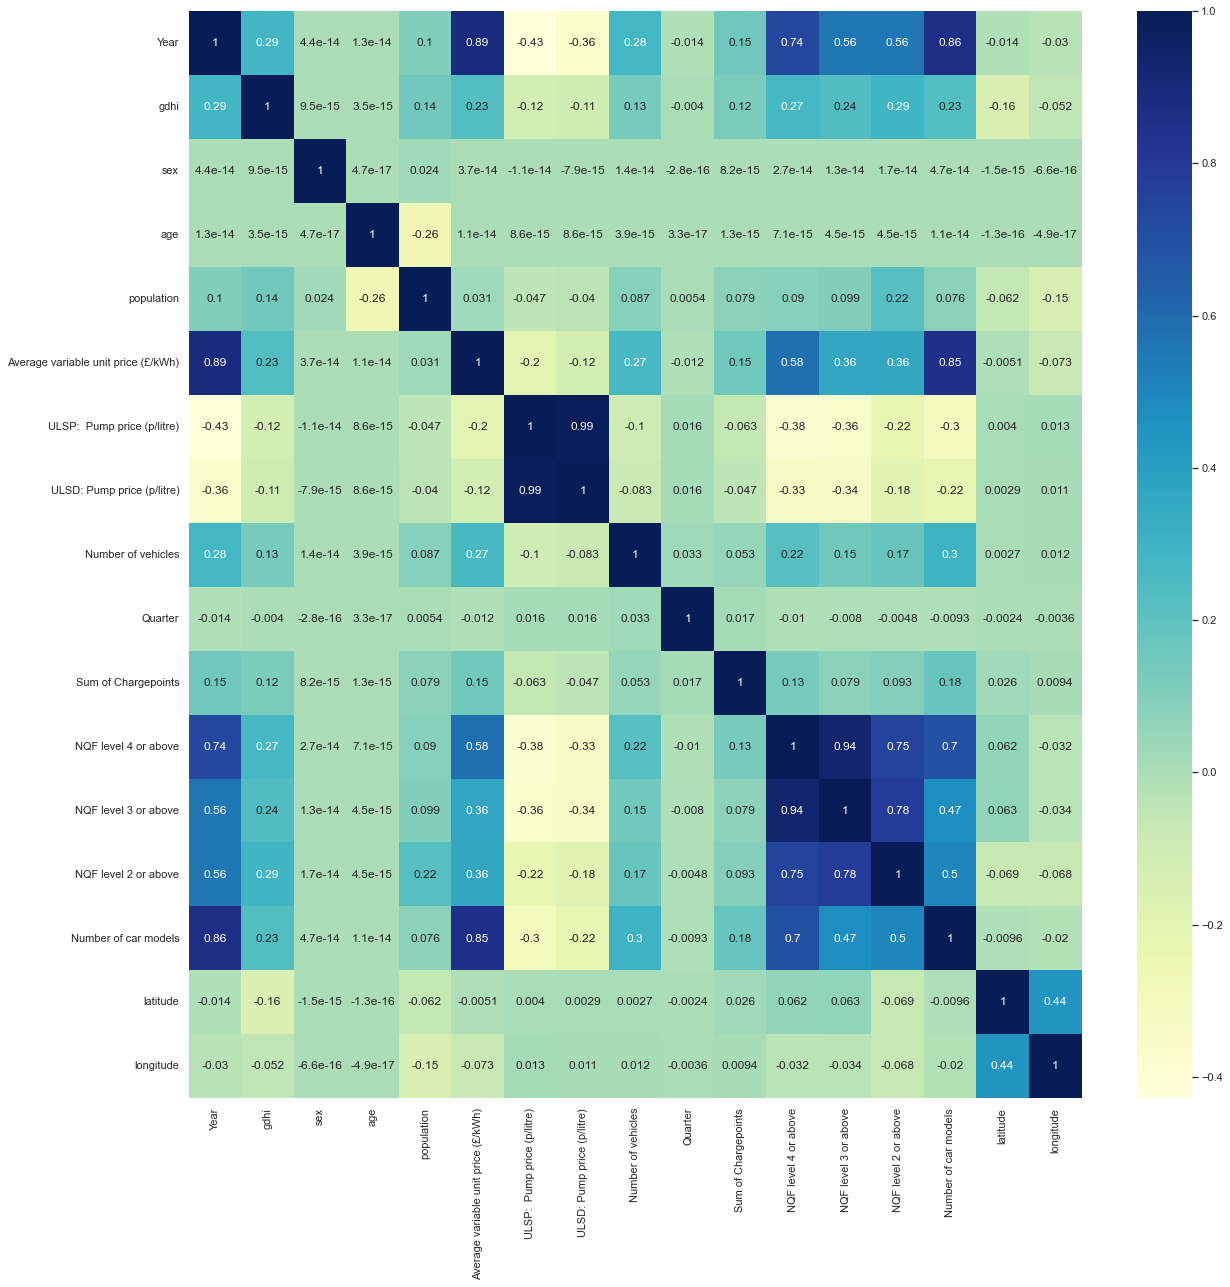

In [53]:
correlation_ev = ev_df.corr()
correlation_ev
# make it bigger
sns.set(rc={'figure.figsize':(20,20)})
# make a heatmap and make it pretty
sns.heatmap(correlation_ev, cmap="YlGnBu", annot=True)

In [54]:
ev_df.shape

(2674854, 23)

In [55]:
# drop age column
ev_df = ev_df.drop(columns=['age','sex','BodyType','Fuel','Keepership'])
# strip spaces from column names
ev_df.columns = ev_df.columns.str.strip()
# aggregate and mean of the values 'population' and 'Number of vehicles'
ev_df = ev_df.groupby(['ITL level 3','Year','Quarter', 'gdhi','ITL level 1', 'ITL level 2','Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                    'Sum of Chargepoints', 'NQF level 4 or above',
                    'NQF level 3 or above', 'NQF level 2 or above','latitude','longitude']).mean()
# drop rows with duplicate values
ev_df = ev_df.drop_duplicates()
# reset index
ev_df = ev_df.reset_index()
ev_df.shape



(6592, 18)

In [56]:
ev_df
# save the dataframe as a csv file
ev_df.to_csv('data/Cleaned data/ev_df.csv', index=False)

<AxesSubplot: >

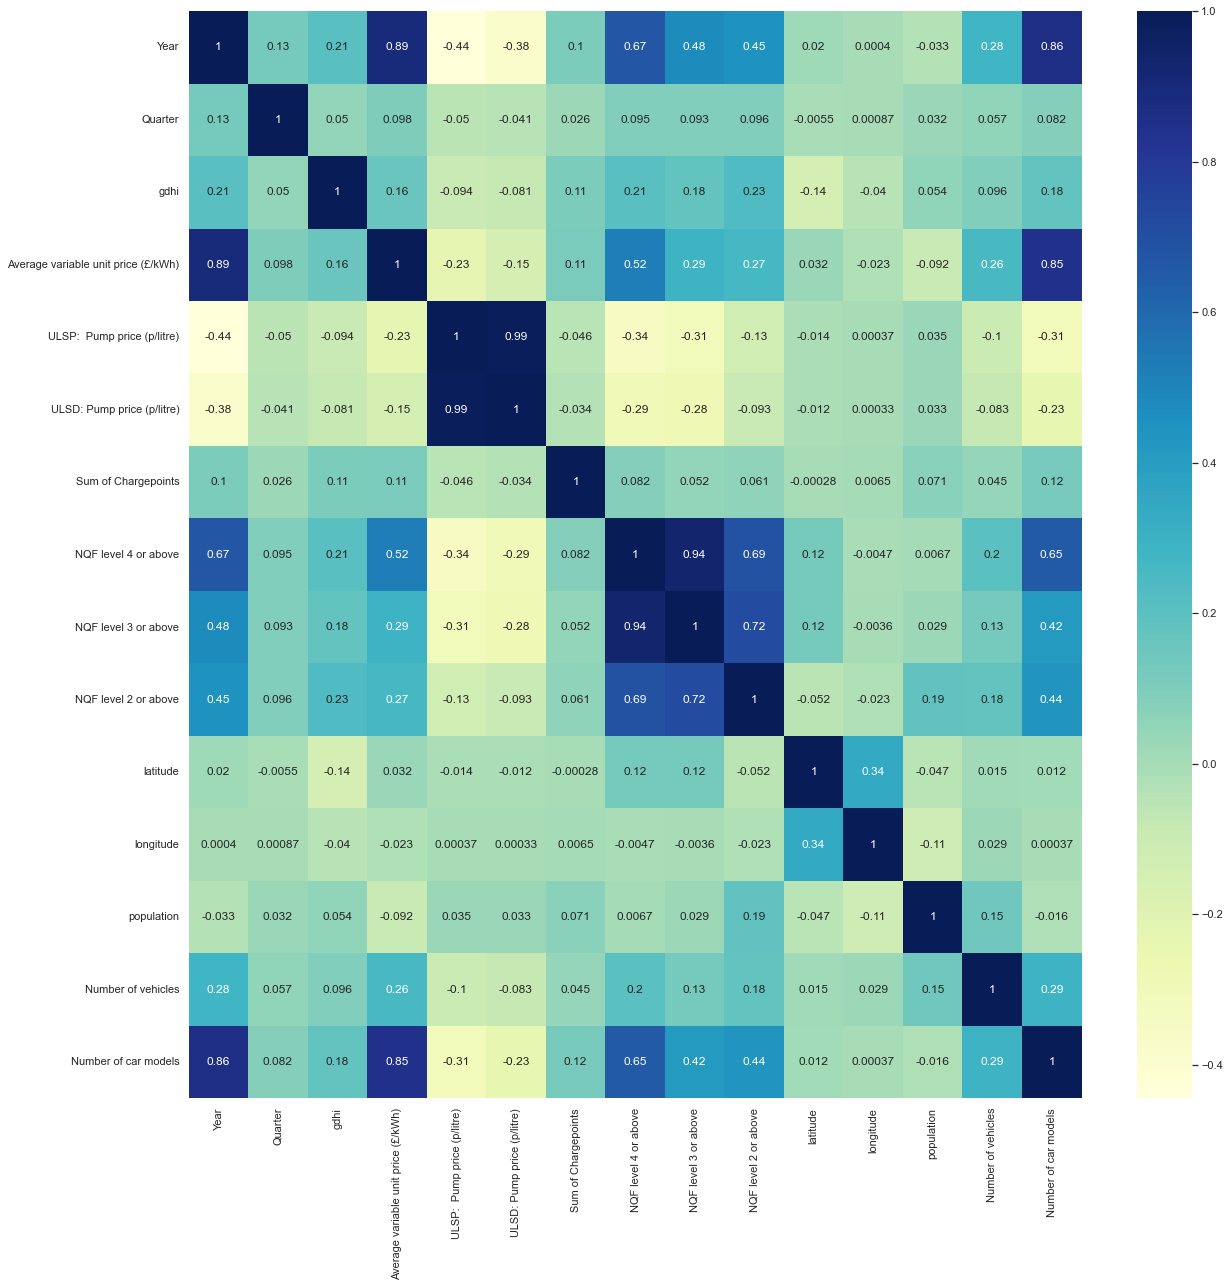

In [57]:
# check correlation heatmap again
correlation_ev = ev_df.corr()
sns.heatmap(correlation_ev, cmap="YlGnBu", annot=True)

In [58]:
# try all the below models

# ARIMA model, Winters' method
# can't use these because they have no spatial component

# SSA model (Singular Spectrum Analysis) with SVAR (Spatial Vector Autoregression)

# VARMAX (Vector Autoregression Moving Average with eXogenous regressors)

# SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors)
# can't use this because no spatial component

# TBATS (Exponential smoothing state space model with Box-Cox transformation, ARMA errors, Trend and Seasonal components)

# Artificial Neural Network (ANN)

# LSTM (Long Short Term Memory)

# Prophet (Facebook's forecasting tool)

# seq2seq (Sequence to Sequence learning with Neural Networks)

In [59]:

# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['Year', 'Quarter','gdhi', 'population', 'Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                    'Sum of Chargepoints', 'NQF level 4 or above',
                    'NQF level 3 or above', 'NQF level 2 or above','latitude', 'longitude','Number of car models']

# Fit OLS regression model with spatial weight matrix
spatial_weights = libpysal.weights.KNN.from_array(ev_df[['latitude', 'longitude']].values, k=9)  # Adjust k as needed
model = spreg.OLS(ev_df[dependent_var].values, ev_df[explanatory_vars].values, w=spatial_weights)

# Print regression results
print(model.summary)


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        6592
Mean dependent var  :    359.2931                Number of Variables   :          15
S.D. dependent var  :   1183.5771                Degrees of Freedom    :        6577
R-squared           :      0.1198
Adjusted R-squared  :      0.1179
Sum squared residual:8127252464.934                F-statistic           :     63.9183
Sigma-square        : 1235708.144                Prob(F-statistic)     :  3.453e-170
S.E. of regression  :    1111.624                Log likelihood        :  -55579.636
Sigma-square ML     : 1232896.308                Akaike info criterion :  111189.273
S.E of regression ML:   1110.3586                Schwarz criterion     :  111291.177

---------------------------------------------------------------------------

/opt/homebrew/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 177 disconnected components.
  warnings.warn(message)


In [60]:
# perform Geographically Weighted Regression (GWR)
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['Year','Number of car models', 'Quarter','gdhi', 'population', 'Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                    'Sum of Chargepoints', 'NQF level 4 or above',
                    'NQF level 3 or above', 'NQF level 2 or above','latitude', 'longitude']

# Fit GWR model with spatial weight matrix
spatial_weights = libpysal.weights.KNN.from_array(ev_df[['latitude', 'longitude']].values, k=7)  # Adjust k as needed
model = spreg.GM_Error_Het(ev_df[dependent_var].values, ev_df[explanatory_vars].values, w=spatial_weights)

# Print regression results
print(model.summary)


REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES (HET)
---------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        6592
Mean dependent var  :    359.2931                Number of Variables   :          15
S.D. dependent var  :   1183.5771                Degrees of Freedom    :        6577
Pseudo R-squared    :      0.0928
N. of iterations    :           1                Step1c computed       :          No

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT    -83996.8011427    35175.0566601      -2.3879649       0.0169420
               var_1      40.5171373      17.3729605       2.3321953       0

/opt/homebrew/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 177 disconnected components.
  warnings.warn(message)


In [61]:
ev_df_yearly = ev_df.copy()
ev_df_yearly = ev_df_yearly.drop(columns=['Quarter'])
# aggregate and use max of the values 'population',"Sum of Chargepoints", 'Number of vehicles'
ev_df_yearly = ev_df_yearly.groupby(['ITL level 3','Year','gdhi','ITL level 1', 'ITL level 2','Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                    'NQF level 4 or above','latitude','population',
                    'NQF level 3 or above',
                    'NQF level 2 or above','longitude']).max()
ev_df_yearly.reset_index(inplace=True)

In [62]:
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['Year','gdhi', 'population', 'Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                     'NQF level 4 or above',
                    'NQF level 3 or above', 'NQF level 2 or above','latitude', 'longitude','Number of car models']

# Fit OLS regression model with spatial weight matrix
spatial_weights = libpysal.weights.KNN.from_array(ev_df_yearly[['latitude', 'longitude']].values, k=10)  # Adjust k as needed
model = spreg.OLS(ev_df_yearly[dependent_var].values, ev_df_yearly[explanatory_vars].values, w=spatial_weights)

# Print regression results
print(model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        1947
Mean dependent var  :    367.3274                Number of Variables   :          13
S.D. dependent var  :   1328.4090                Degrees of Freedom    :        1934
R-squared           :      0.1356
Adjusted R-squared  :      0.1303
Sum squared residual:2968318737.902                F-statistic           :     25.2871
Sigma-square        : 1534808.034                Prob(F-statistic)     :   2.107e-53
S.E. of regression  :    1238.874                Log likelihood        :  -16622.604
Sigma-square ML     : 1524560.215                Akaike info criterion :   33271.207
S.E of regression ML:   1234.7308                Schwarz criterion     :   33343.670

---------------------------------------------------------------------------

/opt/homebrew/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 177 disconnected components.
  warnings.warn(message)


In [63]:
# clustering using KMeans
from sklearn.cluster import KMeans
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['Year','gdhi', 'population', 'Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                    'NQF level 4 or above',
                    'NQF level 3 or above', 'NQF level 2 or above','latitude', 'longitude','Number of car models']

# Fit KMeans model with spatial weight matrix
spatial_weights = libpysal.weights.KNN.from_array(ev_df_yearly[['latitude', 'longitude']].values, k=10)  # Adjust k as needed
model = KMeans(n_clusters=3, random_state=0).fit(ev_df_yearly[explanatory_vars].values)

# Print regression results

(model.labels_)
(model.cluster_centers_)

# add cluster labels to the dataframe
ev_df_yearly['cluster'] = model.labels_





/opt/homebrew/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 177 disconnected components.
  warnings.warn(message)
/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Forecasting for ITL level 1 only

In [64]:
# create a copy of the dataframe
ev_df_copy = ev_df.copy()
# order the dataframe by Year and Quarter
ev_df_copy = ev_df_copy.sort_values(by=['Year','Quarter'])
# drop latitude and longitude columns
ev_df_copy = ev_df_copy.drop(columns=['latitude','longitude','ITL level 2','ITL level 3'])

# Chargepoint correction
ev_df_chargepoints = ev_df[['Year','Quarter','Sum of Chargepoints','ITL level 1']]
# aggregate the values of Sum of Chargepoints by Year and Quarter
ev_df_chargepoints = ev_df_chargepoints.groupby(['Year','Quarter','ITL level 1']).sum()
# rename the column
ev_df_chargepoints = ev_df_chargepoints.rename(columns={'Sum of Chargepoints': 'Chargepoints'})
# add rows of previous years to next rows to get cumulative sum
ev_df_chargepoints = ev_df_chargepoints.cumsum()
ev_df_chargepoints.reset_index(inplace=True)
# apply the cumulative sum to the original dataframe as a new column by merging the two dataframes
ev_df_copy = pd.merge(ev_df_copy, ev_df_chargepoints, on=['Year','Quarter','ITL level 1'], how='left')
# drop the original Sum of Chargepoints column
ev_df_copy = ev_df_copy.drop(columns=['Sum of Chargepoints'])

# population correction
ev_df_population = ev_df[['Year','Quarter','ITL level 1','population']]
# aggregate the values of population by Year and Quarter
ev_df_population = ev_df_population.groupby(['Year','Quarter','ITL level 1']).sum()
# rename the column
ev_df_population = ev_df_population.rename(columns={'population': 'UK population'})
# add rows of previous years to next rows to get cumulative sum
ev_df_population = ev_df_population.cumsum()
ev_df_population.reset_index(inplace=True)
# apply the cumulative sum to the original dataframe as a new column by merging the two dataframes
ev_df_copy = pd.merge(ev_df_copy, ev_df_population, on=['Year','Quarter','ITL level 1'], how='left')
# drop the original population column
ev_df_copy = ev_df_copy.drop(columns=['population'])

# Number of vehicles correction
ev_df_vehicles = ev_df[['Year','Quarter','Number of vehicles','ITL level 1']]
# aggregate the values of Number of vehicles by Year and Quarter
ev_df_vehicles = ev_df_vehicles.groupby(['Year','Quarter','ITL level 1']).sum()
# rename the column
ev_df_vehicles = ev_df_vehicles.rename(columns={'Number of vehicles': 'Number of vehicles in UK'})
# add rows of previous years to next rows to get cumulative sum
ev_df_vehicles = ev_df_vehicles.cumsum()
ev_df_vehicles.reset_index(inplace=True)
# apply the cumulative sum to the original dataframe as a new column by merging the two dataframes
ev_df_copy = pd.merge(ev_df_copy, ev_df_vehicles, on=['Year','Quarter','ITL level 1'], how='left')
# drop the original Number of vehicles column
ev_df_copy = ev_df_copy.drop(columns=['Number of vehicles'])

# get average variable unit price (£/kWh), ULSP:  Pump price (p/litre), ULSD: Pump price (p/litre), NQF level 4 or above, NQF level 3 or above, NQF level 2, gdhi or above for each year and quarter
ev_df_avg = ev_df[['Year','Quarter','Average variable unit price (£/kWh)','ULSP:  Pump price (p/litre)','ULSD: Pump price (p/litre)','NQF level 4 or above','NQF level 3 or above','NQF level 2 or above','gdhi','ITL level 1']]
# aggregate the values of Average variable unit price (£/kWh), ULSP:  Pump price (p/litre), ULSD: Pump price (p/litre), NQF level 4 or above, NQF level 3 or above, NQF level 2 or above by Year and Quarter
ev_df_avg = ev_df_avg.groupby(['Year','Quarter','ITL level 1']).mean()
ev_df_avg.reset_index(inplace=True)
# apply the average to the original dataframe as a new column by merging the two dataframes
ev_df_copy = pd.merge(ev_df_copy, ev_df_avg, on=['Year','Quarter','ITL level 1'], how='left')

# drop original columns
ev_df_copy = ev_df_copy.drop(columns=['Average variable unit price (£/kWh)_x','ULSP:  Pump price (p/litre)_x','ULSD: Pump price (p/litre)_x','NQF level 4 or above_x','NQF level 3 or above_x','NQF level 2 or above_x','gdhi_x'])

# rename columns
ev_df_copy = ev_df_copy.rename(columns={'Average variable unit price (£/kWh)_y': 'Average variable unit price (£/kWh)','ULSP:  Pump price (p/litre)_y': 'ULSP:  Pump price (p/litre)','ULSD: Pump price (p/litre)_y': 'ULSD: Pump price (p/litre)','NQF level 4 or above_y': 'NQF level 4 or above','NQF level 3 or above_y': 'NQF level 3 or above','NQF level 2 or above_y': 'NQF level 2 or above','gdhi_y': 'gdhi'})


# drop duplicate rows
ev_df_copy = ev_df_copy.drop_duplicates()
# reset names of columns to original names
ev_df_copy = ev_df_copy.rename(columns={"UK population": "population", "Number of vehicles in UK": "Number of vehicles", "Chargepoints": "Sum of Chargepoints"})

ev_df_copy
# drop null values
ev_df_copy = ev_df_copy.dropna()
# save the dataframe as a csv file
ev_df_copy.to_csv('data/Cleaned data/ev_df_copy.csv', index=False)


In [65]:
ev_df_copy

,Year,Quarter,ITL level 1,Number of car models,Sum of Chargepoints,population,Number of vehicles,Average variable unit price (£/kWh),ULSP: Pump price (p/litre),ULSD: Pump price (p/litre),NQF level 4 or above,NQF level 3 or above,NQF level 2 or above,gdhi
0,2010,1,Scotland,2.0,0,1.899124e+05,7.453333e+02,0.117261,116.904146,119.234615,37.0,58.0,77.0,15752.130435
2,2010,1,Northern Ireland,2.0,0,1.609992e+05,7.453333e+02,0.147227,116.904146,119.234615,31.0,51.0,71.0,13477.090909
5,2010,1,London,2.0,0,9.970620e+04,7.453333e+02,0.112747,116.904146,119.234615,38.0,59.0,78.0,23079.333333
7,2010,1,Yorkshire and The Humber,2.0,0,3.441465e+05,9.123333e+02,0.110018,116.904146,119.234615,38.0,59.0,78.0,14153.727273
8,2010,1,East of England,2.0,0,5.541227e+04,1.950000e+01,0.106334,116.904146,119.234615,38.0,59.0,78.0,16421.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2020,4,North West,29.0,54482,1.358377e+07,2.231069e+06,0.169144,114.092268,119.455858,47.0,66.0,83.0,19009.200000
6430,2020,4,South West,29.0,55174,1.370596e+07,2.321926e+06,0.178331,114.092268,119.455858,47.0,66.0,83.0,20829.166667
6434,2020,4,Wales,29.0,55259,1.372389e+07,2.326232e+06,0.179522,114.092268,119.455858,41.0,61.0,81.0,17571.250000
6457,2020,4,North East,29.0,54275,1.354345e+07,2.208026e+06,0.166792,114.092268,119.455858,47.0,66.0,83.0,17577.833333


<AxesSubplot: >

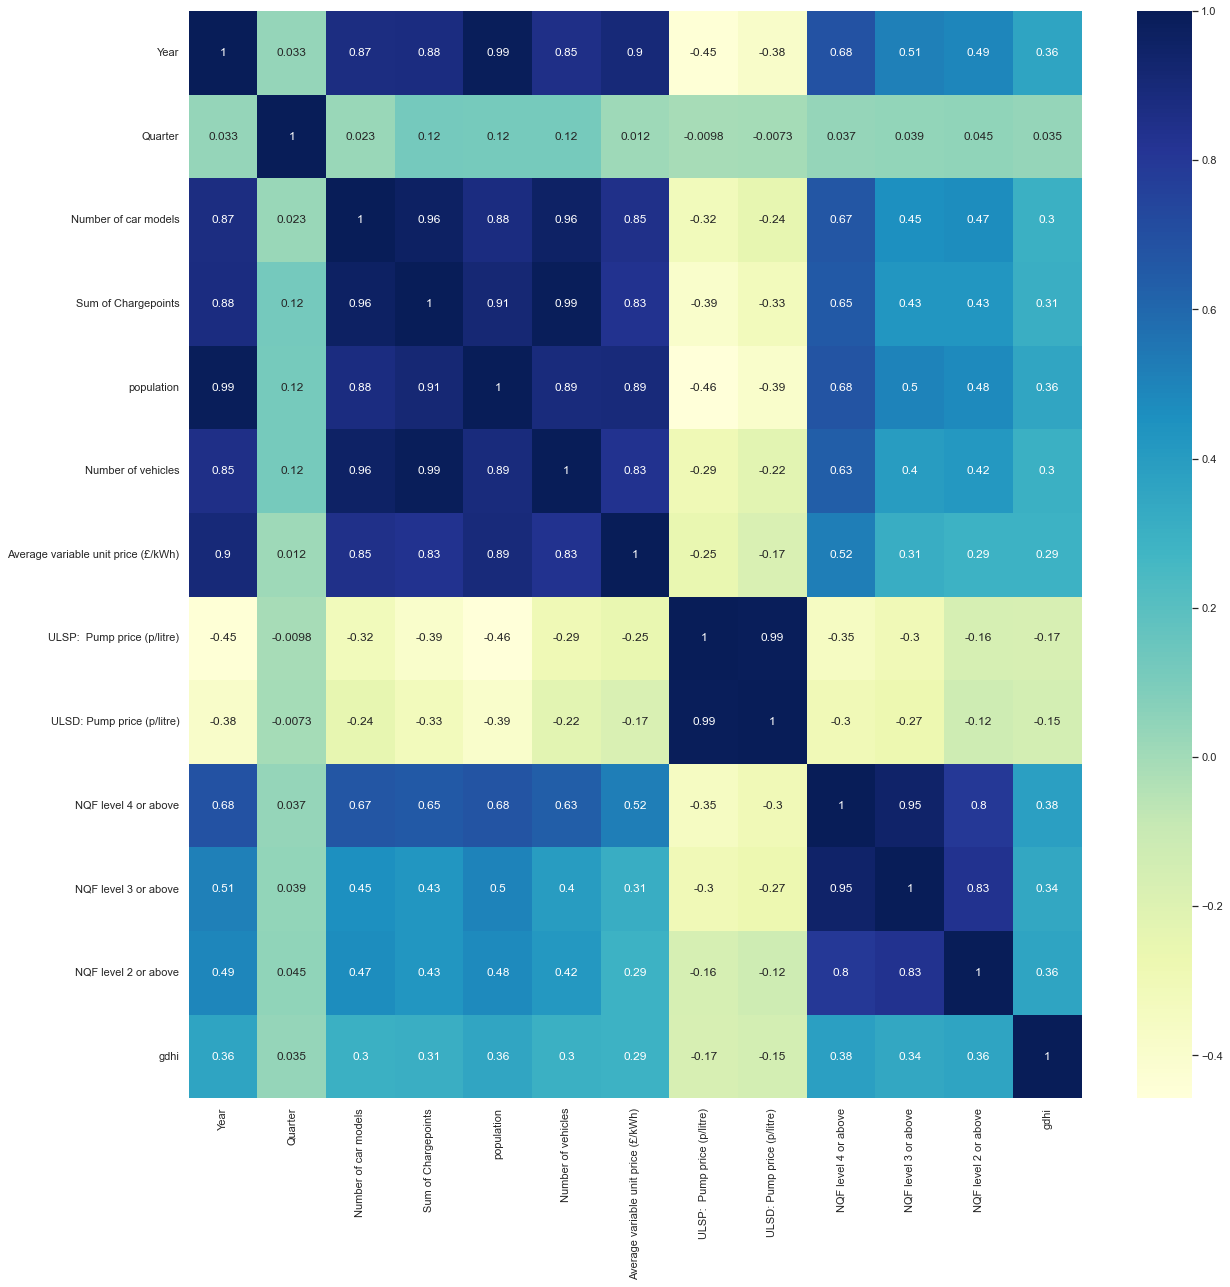

In [66]:
# check correlation heatmap again
correlation_ev = ev_df_copy.corr()
sns.heatmap(correlation_ev, cmap="YlGnBu", annot=True)


In [67]:
# split the data into train and test sets
train = ev_df_copy[ev_df_copy['Year'] < 2019]
test = ev_df_copy[ev_df_copy['Year'] >= 2019]

In [68]:
# run the model again
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'

explanatory_vars = ['population', 'Average variable unit price (£/kWh)',
                    'Sum of Chargepoints', 'Number of car models']

# Fit OLS regression model
model = sm.OLS(train[dependent_var].values, train[explanatory_vars].values)

# Print regression results
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              1858.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):                   8.27e-257
Time:                        16:13:27   Log-Likelihood:                         -5126.8
No. Observations:                 404   AIC:                                  1.026e+04
Df Residuals:                     400   BIC:                                  1.028e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<AxesSubplot: ylabel='Count'>

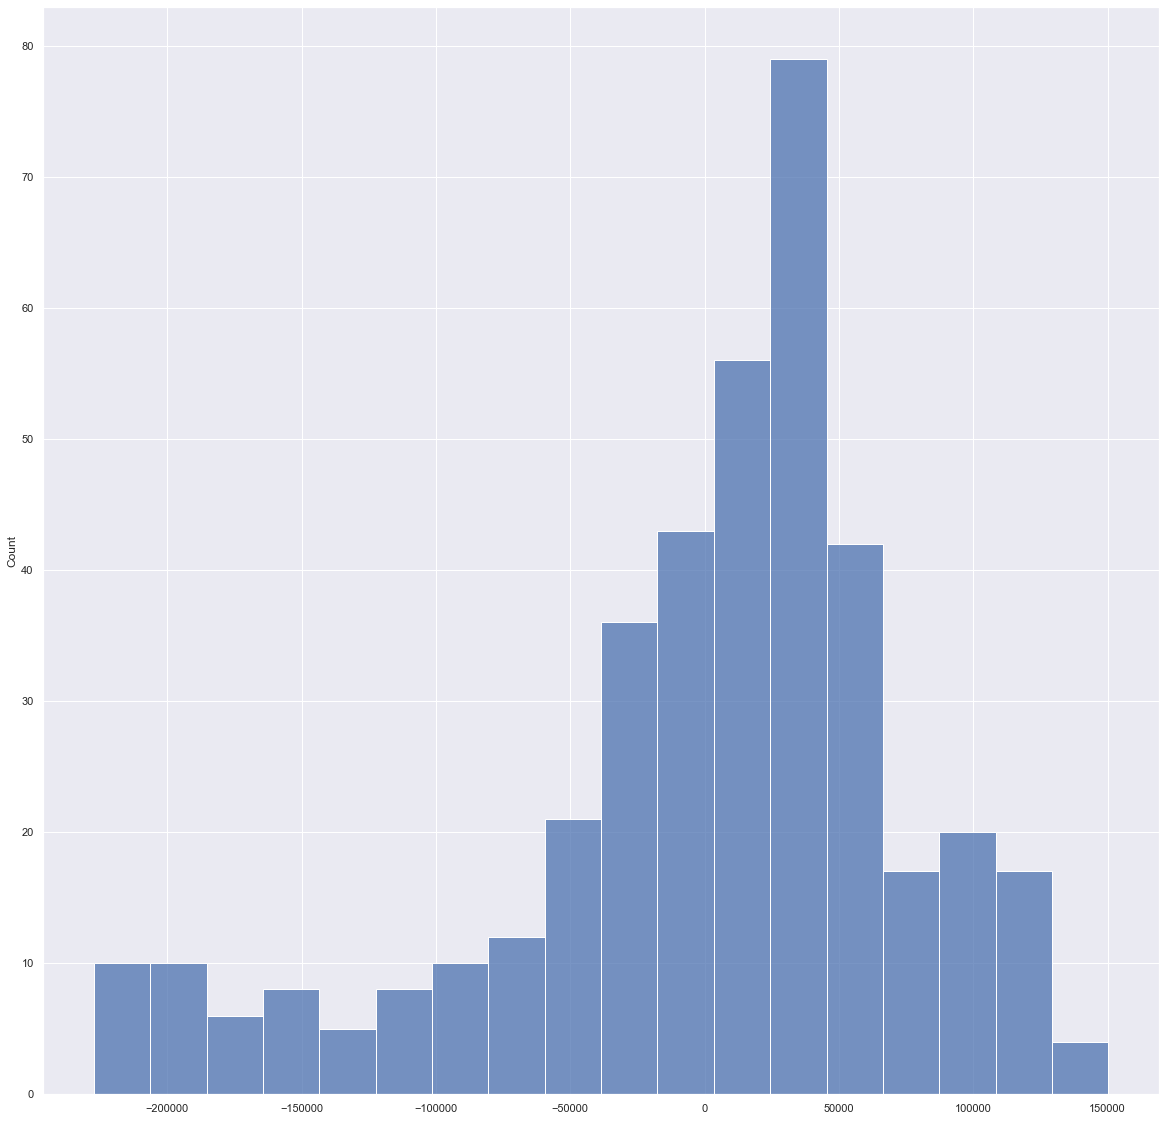

In [69]:
# check histogram of residuals
sns.histplot(model.fit().resid)

0.33943107909262416

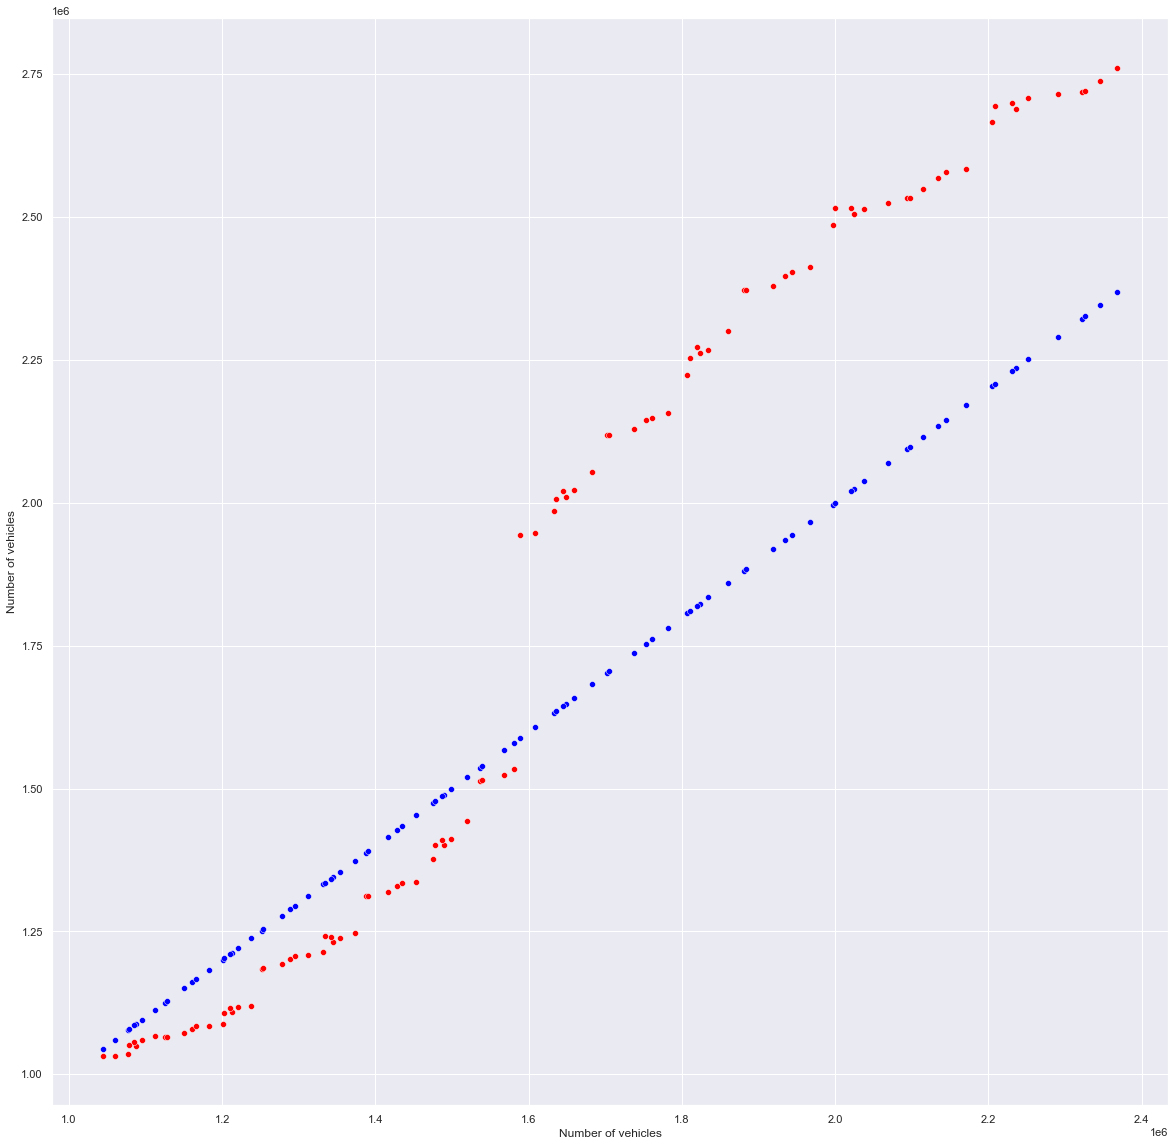

In [70]:
# plot the predicted values against the actual values using the test set with predicted values as red and actual values as blue
sns.scatterplot(x=test['Number of vehicles'], y=model.fit().predict(test[explanatory_vars]), color='red')
sns.scatterplot(x=test['Number of vehicles'], y=test['Number of vehicles'], color='blue')

# import r2_score
from sklearn.metrics import r2_score
# get r2 score
r2_score(test['Number of vehicles'], model.fit().predict(test[explanatory_vars]))


/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<AxesSubplot: xlabel='Sum of Chargepoints', ylabel='Number of vehicles'>

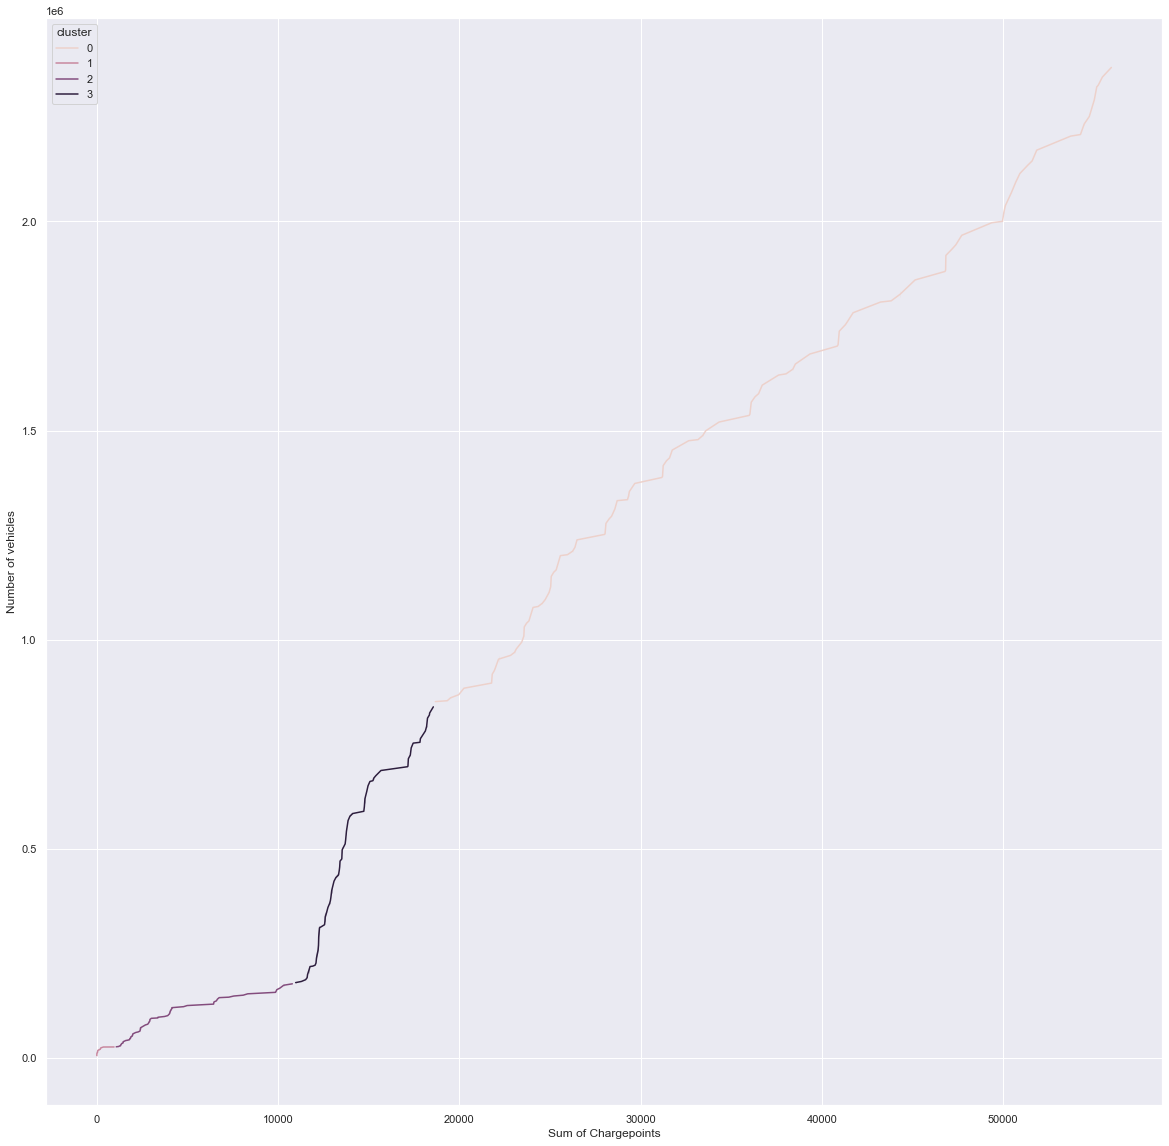

In [71]:
# do a cluster analysis
# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'

explanatory_vars = ['population', 'Average variable unit price (£/kWh)',
                    'ULSP:  Pump price (p/litre)', 'ULSD: Pump price (p/litre)',
                    'Sum of Chargepoints', 'Number of car models']

# Fit KMeans model
model = KMeans(n_clusters=4, random_state=0).fit(ev_df_copy[explanatory_vars].values)

# Print regression results
(model.labels_)
(model.cluster_centers_)

# use the cluster labels as a new column in the dataframe
ev_df_copy['cluster'] = model.labels_
# plot the data for number of vehicles by cluster and grid by ITL level 1
sns.lineplot(data=ev_df_copy, x="Sum of Chargepoints", y="Number of vehicles", hue="cluster")




/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61873D+01    |proj g|=  1.66138D+01

At iterate    5    f=  1.18866D+01    |proj g|=  9.13455D-01

At iterate   10    f=  1.17409D+01    |proj g|=  2.21931D-01

At iterate   15    f=  1.14907D+01    |proj g|=  1.29667D-01

At iterate   20    f=  1.14444D+01    |proj g|=  1.12230D+00

At iterate   25    f=  1.13487D+01    |proj g|=  8.59054D-02

At iterate   30    f=  1.13477D+01    |proj g|=  2.34716D-01

At iterate   35    f=  1.13275D+01    |proj g|=  5.74261D-01

At iterate   40    f=  1.13199D+01    |proj g|=  1.27589D-01

At iterate   45    f=  1.13194D+01    |proj g|=  6.68737D-03

At iterate   50    f=  1.13194D+01    |proj g|=  3.17701D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


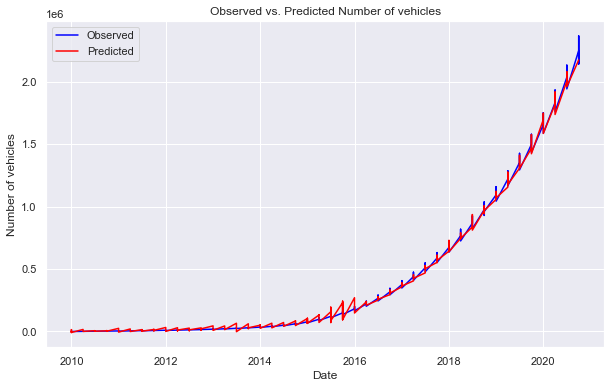

In [72]:
# Create a datetime index based on 'Year' and 'Quarter' columns
ev_df_copy['Date'] = pd.to_datetime(ev_df_copy['Year'].astype(str) + 'Q' + ev_df_copy['Quarter'].astype(str))
ev_df_copy.set_index('Date', inplace=True)

# Define your dependent variable and explanatory variables
dependent_var = 'Number of vehicles'
explanatory_vars = ['population', 'Average variable unit price (£/kWh)',
                    'Sum of Chargepoints', 'Number of car models']

# Fit the SARIMAX model
endog = ev_df_copy[dependent_var]
exog = ev_df_copy[explanatory_vars]
sarimax_model = SARIMAX(endog, exog=exog, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4))
sarimax_result = sarimax_model.fit()

# Print the summary of the SARIMAX model
print(sarimax_result.summary())

# Get the predicted values from the SARIMAX model
predicted_values = sarimax_result.predict(start='2010-01-01', end='2020-10-01', exog=exog['2010-01-01':'2020-10-01'])

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Observed', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.legend()
plt.show()


Normaltest p-value: 1.911957210303402e-13


/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


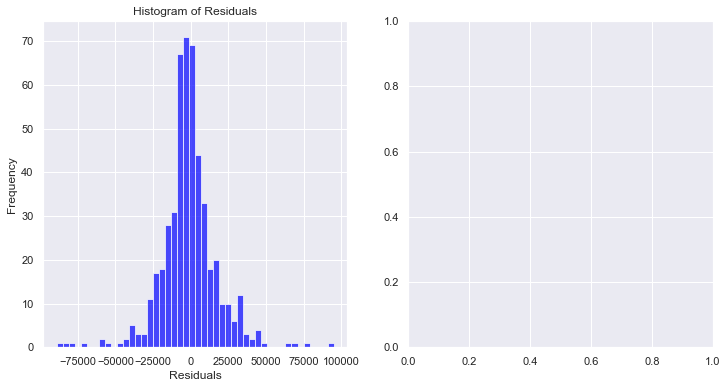

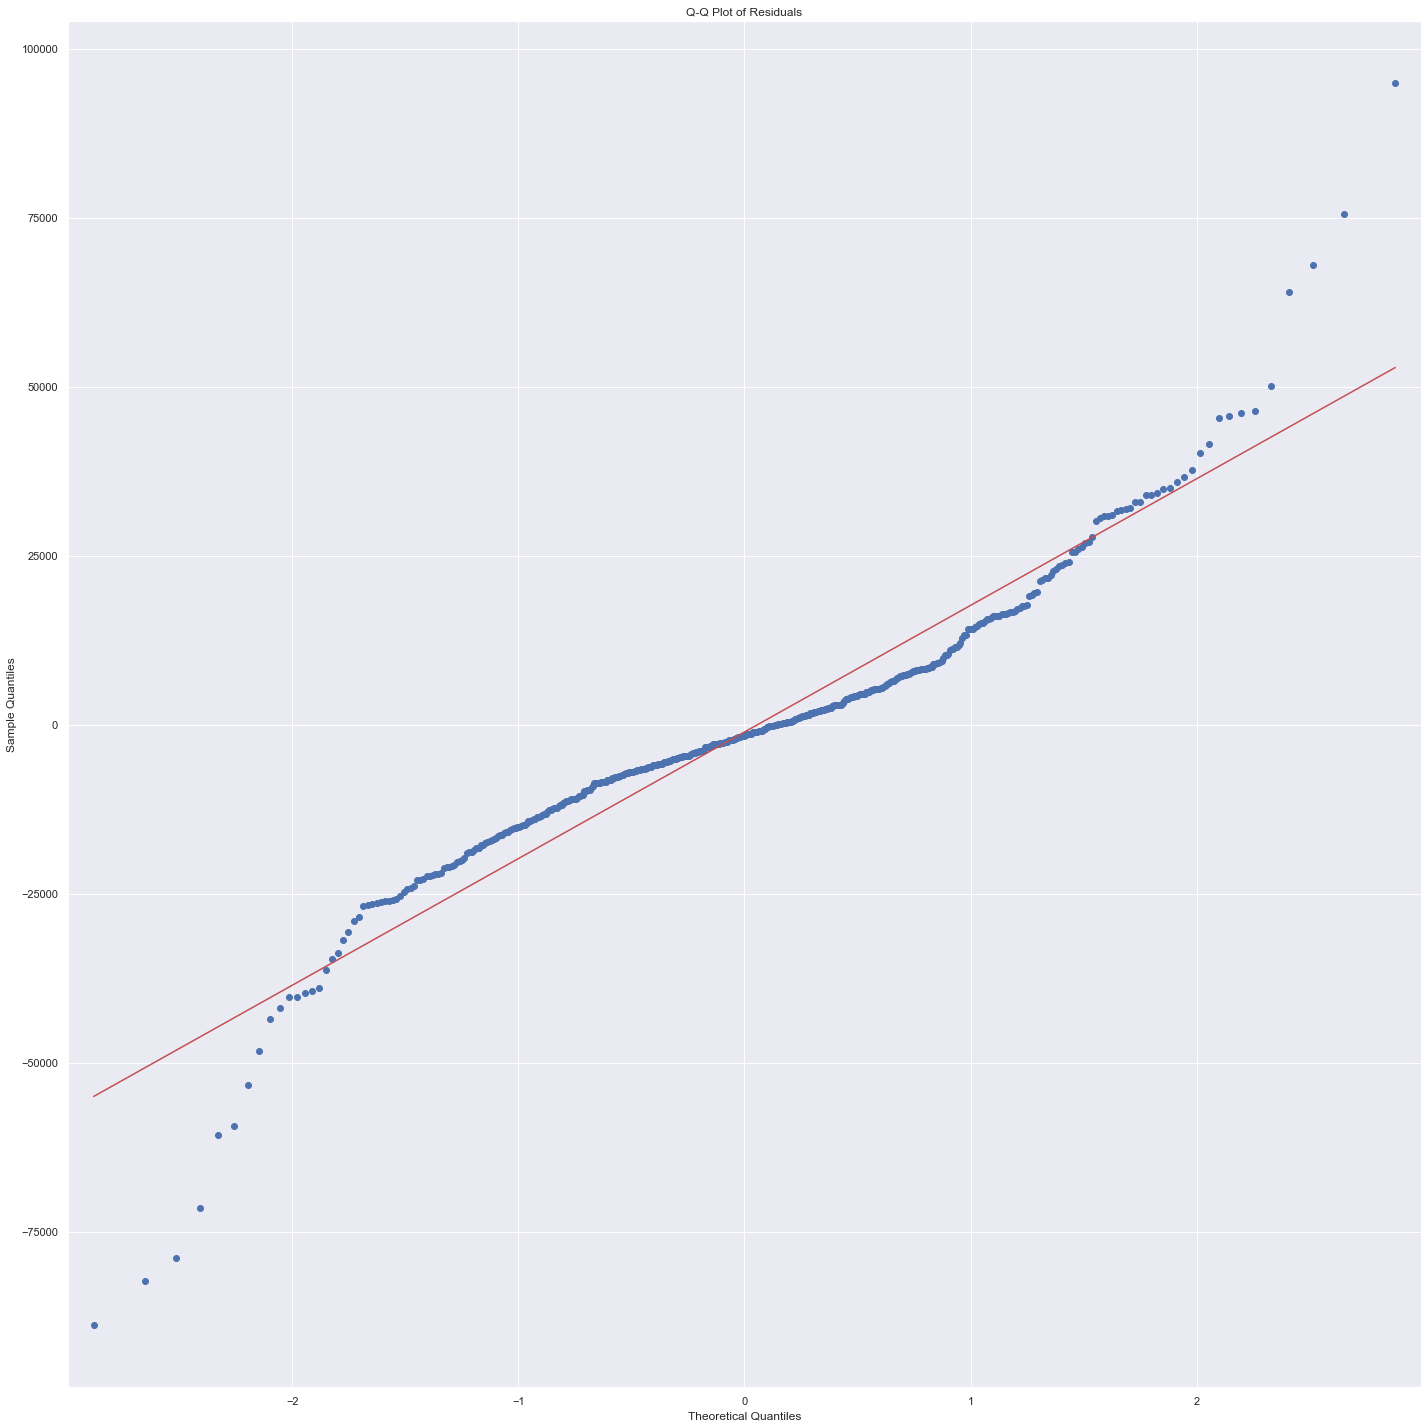

In [73]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'sarimax_result' contains the fitted SARIMAX model results

# Get the residuals from the fitted model
residuals = sarimax_result.resid

# Shapiro-Wilk test for normality
normaltest_result = stats.normaltest(residuals)
print("Normaltest p-value:", normaltest_result.pvalue)

# Visual inspection: Histogram and Q-Q plot
plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 2, 1)
plt.hist(residuals, bins='auto', color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
sm.graphics.qqplot(residuals, line='s', color='blue')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


In [74]:
# Assuming 'sarimax_result' contains the fitted SARIMAX model results

# Get the covariance matrix of the model
cov_matrix = sarimax_result.cov_params()

# Display the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
                                       population  \
population                           1.084142e-04   
Average variable unit price (£/kWh) -6.051715e-04   
Sum of Chargepoints                 -9.670487e-03   
Number of car models                -5.711401e-01   
ar.L1                               -5.715612e-06   
ma.L1                               -3.035596e-05   
ar.S.L4                              9.341938e-05   
ma.S.L4                             -6.176180e-05   
sigma2                               8.695957e-07   

                                     Average variable unit price (£/kWh)  \
population                                                     -0.000605   
Average variable unit price (£/kWh)                             1.445263   
Sum of Chargepoints                                            -0.190439   
Number of car models                                         1363.978255   
ar.L1                                                           0.0004

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create a copy of the dataframe with only columns found in explanatory_vars
ev_df_expl = ev_df_copy[explanatory_vars].copy()

vif_data = pd.DataFrame()
vif_data['Variable'] = ev_df_expl.columns
vif_data['VIF'] = [variance_inflation_factor(ev_df_expl.values, i) for i in range(ev_df_expl.shape[1])]

print(vif_data)


                              Variable        VIF
0                           population  23.754729
1  Average variable unit price (£/kWh)  18.405974
2                  Sum of Chargepoints  30.423755
3                 Number of car models  47.437998


## Correcting MultiCollinearity

In [76]:
explanatory_vars

['population',
 'Average variable unit price (£/kWh)',
 'Sum of Chargepoints',
 'Number of car models']

In [77]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import TimeSeriesSplit

# Assuming you have your dataset loaded into a pandas DataFrame called 'data'
# Extract the target variable 'Number of vehicles' and the explanatory variables into X and y
y = ev_df_copy['Number of vehicles']
X = ev_df_copy[['population', 'Average variable unit price (£/kWh)', 'Sum of Chargepoints', 'Number of car models']]

# Convert X and y to NumPy arrays to ensure they contain numerical data
X = X.values
y = y.values

# Create a TimeSeriesSplit cross-validation object
tscv = TimeSeriesSplit(n_splits=5)

# Define a list of alpha values to try
alphas = [0.01, 0.1, 1.0, 10.0]

# Create and fit the LassoCV model on your data
lasso_cv = LassoCV(alphas=alphas, cv=tscv)
lasso_cv.fit(X, y)

# Get the selected alpha value
selected_alpha = lasso_cv.alpha_
lasso_coefs = lasso_cv.coef_

# Select the relevant explanatory variables based on non-zero Lasso coefficients
selected_explanatory_vars = X[:, lasso_coefs != 0]



In [78]:
# Fit the SARIMAX model with the selected explanatory variables
sarimax_model = SARIMAX(y, exog=selected_explanatory_vars, order=(1, 0, 1), seasonal_order=(1, 0, 1, 4), 
                        enforce_stationarity=False, enforce_invertibility=False, trend='c')
results = sarimax_model.fit()

# Print the SARIMAX model summary
print(results.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.14908D+01    |proj g|=  6.23261D-01

At iterate    5    f=  1.13904D+01    |proj g|=  4.20764D-01

At iterate   10    f=  1.13863D+01    |proj g|=  1.36061D-01


 This problem is unconstrained.



At iterate   15    f=  1.13849D+01    |proj g|=  2.62251D-01

At iterate   20    f=  1.13350D+01    |proj g|=  1.34423D+00

At iterate   25    f=  1.12750D+01    |proj g|=  1.13848D+00

At iterate   30    f=  1.12571D+01    |proj g|=  1.62926D-01

At iterate   35    f=  1.12560D+01    |proj g|=  9.61972D-02

At iterate   40    f=  1.12231D+01    |proj g|=  7.44388D-01

At iterate   45    f=  1.11765D+01    |proj g|=  1.87450D-01

At iterate   50    f=  1.11656D+01    |proj g|=  6.90948D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     74      1     0     0   6.909D-02   1.117D+01
  F =   11.1655922490

/opt/homebrew/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


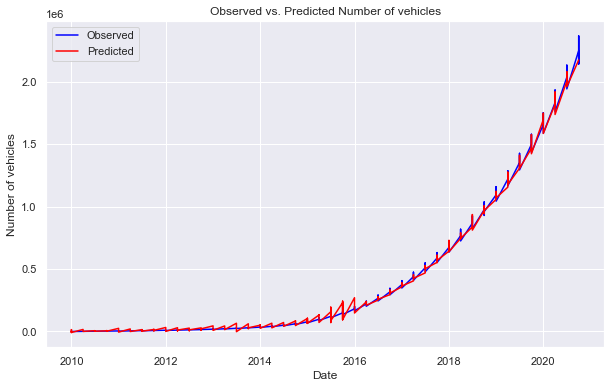

In [79]:
# Get the predicted values from the SARIMAX model
predicted_values = sarimax_result.predict(start='2010-01-01', end='2020-10-01', exog=exog['2010-01-01':'2020-10-01'])

# Plot the observed and predicted values
plt.figure(figsize=(10, 6))
plt.plot(endog.index, endog, label='Observed', color='blue')
plt.plot(predicted_values.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of vehicles')
plt.title('Observed vs. Predicted Number of vehicles')
plt.legend()
plt.show()

Normaltest p-value: 1.911957210303402e-13


/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


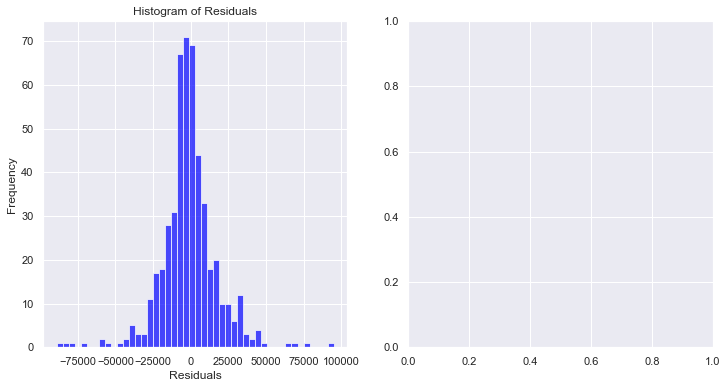

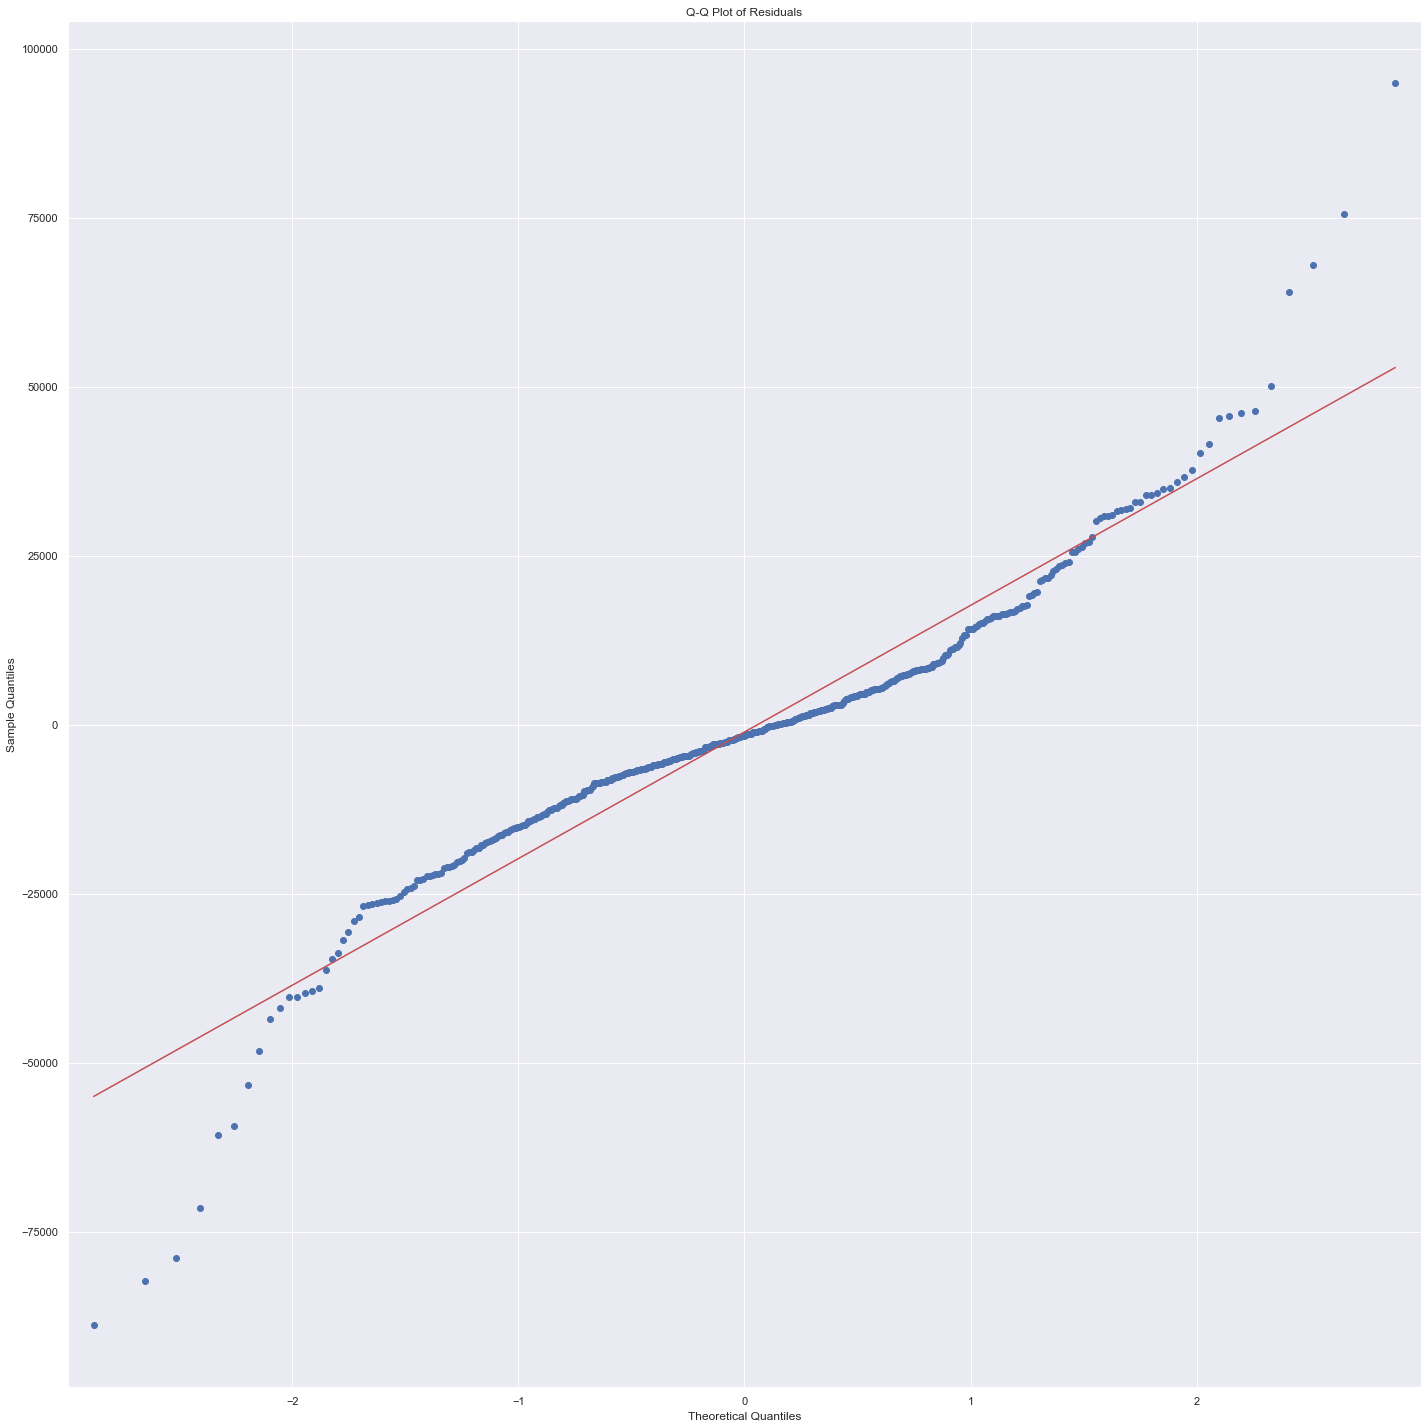

In [80]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'sarimax_result' contains the fitted SARIMAX model results

# Get the residuals from the fitted model
residuals = sarimax_result.resid

# Shapiro-Wilk test for normality
normaltest_result = stats.normaltest(residuals)
print("Normaltest p-value:", normaltest_result.pvalue)

# Visual inspection: Histogram and Q-Q plot
plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 2, 1)
plt.hist(residuals, bins='auto', color='blue', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
sm.graphics.qqplot(residuals, line='s', color='blue')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()


### Explanation of output
The output is the result of a SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) model that has been fitted to a time series dataset. Let's break down the interpretation:

- Dep. Variable: This represents the dependent variable (target variable) of the model, denoted as 'y'.
- No. Observations: The number of observations in the dataset, which is 500 in this case.
- Model: The SARIMAX model specification used for the analysis. It consists of four components: (1, 0, 1) for the non-seasonal part and (1, 0, 1, 4) for the seasonal part. These numbers represent the orders of autoregressive (AR), differencing (I), moving average (MA), and seasonal autoregressive (SAR) terms, respectively.
- Log Likelihood: The log-likelihood is a measure of how well the model fits the data. The higher the log-likelihood, the better the model fits the data. In this case, the log-likelihood is -5658.962.
- AIC (Akaike Information Criterion): AIC is a model selection criterion that penalizes models with more parameters to avoid overfitting. Lower AIC values indicate better-fitted models. In this case, the AIC is 11335.925.
- BIC (Bayesian Information Criterion): Similar to AIC, BIC is another model selection criterion. It also penalizes complex models but more severely than AIC. Again, lower BIC values indicate better-fitted models. In this case, the BIC is 11373.856.
- Sample: This indicates the time range of the dataset used for the analysis, from 0 to 500.
- Covariance Type: The type of covariance estimation used in the analysis. In this case, 'opg' stands for "Outer Product of Gradients" method.
- Coefficients (coef): These are the estimated coefficients of the exogenous variables ('x1', 'x2', 'x3', 'x4') and the autoregressive and moving average terms ('ar.L1', 'ma.L1', 'ar.S.L4', 'ma.S.L4') in the model. Each coefficient represents the estimated effect of the corresponding variable on the dependent variable.
- Std Err: The standard error of the coefficient estimates. It measures the uncertainty of the estimated coefficients.
- z-value: The z-value is the ratio of the estimated coefficient to its standard error. It is used to test the significance of the coefficient. In this case, the coefficient estimates are statistically significant (P < |z| = 0.05) for all the variables.
- P>|z|: The p-value associated with the z-value. It indicates the probability of obtaining a z-value as extreme as the observed one if the null hypothesis (the coefficient is zero) is true. In this case, all the p-values are very close to zero, indicating that the coefficients are highly significant.
- [0.025, 0.975]: These are the confidence intervals for the coefficient estimates. They provide a range of plausible values for each coefficient.
- Ljung-Box (Q): This is a test for the absence of serial correlation in the residuals of the model. A lower value (e.g., 0.39) and a higher p-value (e.g., 0.53) indicate that the model's residuals do not exhibit significant serial correlation.
- Jarque-Bera (JB): This is a test for normality of the model's residuals. A higher value (e.g., 440.18) and a lower p-value (e.g., 0.00) indicate that the model's residuals deviate significantly from a normal distribution.
- Heteroskedasticity (H): This is a test for homoscedasticity (constant variance) of the model's residuals. A higher value (e.g., 6.29) and a lower p-value (e.g., 0.00) indicate that the model's residuals exhibit heteroskedasticity.
- Warnings: These are important messages or warnings related to the fitting of the model. In this case, it warns that the covariance matrix calculated using the outer product of gradients is singular or near-singular, which can lead to unstable standard errors. This could be due to multicollinearity or other issues with the data or model.

Overall, the SARIMAX model seems to be reasonably well-fitted to the data, and the coefficients of the exogenous and autoregressive terms are statistically significant. However, further investigation of the model's residuals and potential issues with the covariance matrix may be required to ensure the model's validity.

In [81]:
endog
endog_11 = endog.copy()
# drop the last 11 rows
endog_11 = endog_11[:-11]
endog_11

Date
2010-01-01    7.453333e+02
2010-01-01    7.453333e+02
2010-01-01    7.453333e+02
2010-01-01    9.123333e+02
2010-01-01    1.950000e+01
                  ...     
2020-07-01    2.094443e+06
2020-07-01    2.098237e+06
2020-07-01    2.000353e+06
2020-07-01    1.944298e+06
2020-10-01    2.251271e+06
Name: Number of vehicles, Length: 489, dtype: float64

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    mse = mean_squared_error(actual,forecast) # mse
    r2 = r2_score(actual,forecast) #r2
    print({'mape':mape, 'rmse':rmse, 'mse':mse, 'r2':r2})
    return({mape, rmse, mse, r2})

mape, rmse, mse, r2 = forecast_accuracy(predicted_values,endog_11)

metrics = pd.DataFrame(data = (mape, rmse, mse, r2),\
                        index = ('mape', 'rmse', 'mse', 'r2'))

{'mape': 5.8076230167961365, 'rmse': 17628.99567920854, 'mse': 310781488.6575533, 'r2': 0.9990797798114364}


To evaluate the performance metrics provided, let's interpret each one:

1. **MAPE (Mean Absolute Percentage Error)**: MAPE measures the percentage difference between actual and predicted values. It indicates the average magnitude of the percentage error. In this case, the MAPE is approximately 5.80%, suggesting that the model's predictions have an average absolute percentage error of 5.80%.

2. **RMSE (Root Mean Squared Error)**: RMSE measures the square root of the average of squared differences between actual and predicted values. It represents the standard deviation of the prediction errors. In this case, the RMSE is approximately 17,600, indicating that, on average, the model's predictions deviate by approximately 17,600 units from the actual values.

3. **MSE (Mean Squared Error)**: MSE measures the average of squared differences between actual and predicted values. It is closely related to RMSE but lacks the square root operation. In this case, the MSE is approximately 309,765,914.69, representing the average squared error of the model's predictions.

4. **R2 (R-squared)**: R-squared represents the proportion of variance in the dependent variable (target) that is predictable from the independent variables (predictions). It ranges from 0 to 1, where 0 indicates no predictability, and 1 indicates perfect predictability. In this case, the R-squared is approximately 0.9991, which means that the model explains around 99.91% of the variance in the target variable based on the predictions.

Overall, the provided performance metrics show that the SARIMAX model is performing quite well. The low MAPE, RMSE, and MSE values indicate that the model's predictions are generally accurate and have low error. Additionally, the high R-squared value suggests that the model is explaining a significant portion of the variance in the target variable. However, it is always essential to consider the context of the problem and compare these metrics to other models or benchmarks to get a comprehensive assessment of the model's performance.

In [83]:
exog.reset_index(inplace=True)
exog

,Date,population,Average variable unit price (£/kWh),Sum of Chargepoints,Number of car models
0,2010-01-01,1.899124e+05,0.117261,0,2.0
1,2010-01-01,1.609992e+05,0.147227,0,2.0
2,2010-01-01,9.970620e+04,0.112747,0,2.0
3,2010-01-01,3.441465e+05,0.110018,0,2.0
4,2010-01-01,5.541227e+04,0.106334,0,2.0
...,...,...,...,...,...
495,2020-10-01,1.358377e+07,0.169144,54482,29.0
496,2020-10-01,1.370596e+07,0.178331,55174,29.0
497,2020-10-01,1.372389e+07,0.179522,55259,29.0
498,2020-10-01,1.354345e+07,0.166792,54275,29.0


In [84]:

# locate rows with unique Date values
exog1 = exog.loc[exog['Date'] == '2020-01-01'][:1]
exog2 = exog.loc[exog['Date'] == '2020-04-01'][:1]
exog3 = exog.loc[exog['Date'] == '2020-07-01'][:1]
exog4 = exog.loc[exog['Date'] == '2020-10-01'][:1]
# combine the rows
exog_2020 = pd.concat([exog1,exog2,exog3,exog4])
# set Date as index
exog_2020.set_index('Date', inplace=True)
exog_2020
# increase date by 1 year
exog_2021 = exog_2020.copy()
exog_2021.index = exog_2021.index + pd.DateOffset(years=1)
exog_2021

,population,Average variable unit price (£/kWh),Sum of Chargepoints,Number of car models
Date,,,,
2021-01-01,1.252153e+07,0.173033,38544,29.0
2021-04-01,1.288849e+07,0.173033,44323,29.0
2021-07-01,1.325635e+07,0.173033,50127,29.0
2021-10-01,1.362422e+07,0.173033,54763,29.0


In [85]:
import pickle
pickle.dump(results, open('results.pkl','wb'))
model = pickle.load(open('results.pkl','rb'))



In [86]:
model.forecast(steps=4,exog=exog_2021)

array([1783774.00303919, 1953342.89776036, 2116858.6473772 ,
       2269654.89500602])

In [87]:
# change values of exog_2021 by increasing the values by 10%
exog_2021['population'] = exog_2021['population'] * 1.1

# forecast the values for 2021
model.forecast(steps=4,exog=exog_2021)

array([1860528.321017  , 2032346.59287175, 2198117.27843044,
       2353168.4620011 ])